In [1]:
from shapely.geometry import box
import rasterio
from rasterio.enums import Resampling
import shapely.geometry
from shapely.geometry import Polygon
import rioxarray as rxr
import os
import sys
import matplotlib.pyplot as plt
from rasterio.plot import show
import xarray as xr
import pandas as pd
import numpy as np
import regionmask
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from affine import Affine


In [2]:
pwd

'/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs'

In [3]:
dir_path = r'/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/datas'

read_files = []

for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        read_files.append(path)
print("PATH FILES: \n",*read_files, sep="\n")

PATH FILES: 

20101021_arc2-rain_10d_ARC2-Africa-11km_2.0.tif
20101021_fewsnet-rfe_10d_FEWSNET-Africa-8km_2.0.tif
20101021_tamsat-rfe_10d_TAMSAT-Africa-4km_3.1.tif
20101021_chirps-dekad_10d_CHIRP-Africa-5km_2.0.tif


In [4]:
scale_factor = 1.0/1.0

fname1 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/datas/20101021_fewsnet-rfe_10d_FEWSNET-Africa-8km_2.0.tif'
fname2 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/datas/20101021_tamsat-rfe_10d_TAMSAT-Africa-4km_3.1.tif'
fname3 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/datas/20101021_chirps-dekad_10d_CHIRP-Africa-5km_2.0.tif'
fname4 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/datas/20101021_arc2-rain_10d_ARC2-Africa-11km_2.0.tif'


fout_phy1 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/non_nans/fewsnet.tif'
fout_phy2 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/non_nans/tamsat.tif'
fout_phy3 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/non_nans/chirps.tif'
fout_phy4 = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/non_nans/arc2.tif'


fout_phy1_clipped = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_tif/fewsnet_clipped.tif'
fout_phy2_clipped = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_tif/tamsat_clipped.tif'
fout_phy3_clipped = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_tif/chirps_clipped.tif'
fout_phy4_clipped = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_tif/arc2_clipped.tif'

fout_phy1_clipped_resampled = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/fewsnet_clipped_resampled.tif'
fout_phy2_clipped_resampled = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/tamsat_clipped_resampled.tif'
fout_phy3_clipped_resampled = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/chirps_clipped_resampled.tif'
fout_phy4_clipped_resampled = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/arc2_clipped_resampled.tif'


fout_phy1_clipped_resampled_mask = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/fewsnet_clipped_resampled.nc'
fout_phy2_clipped_resampled_mask = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/tamsat_clipped_resampled.nc'
fout_phy3_clipped_resampled_mask = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/chirps_clipped_resampled.nc'
fout_phy4_clipped_resampled_mask = '/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/arc2_clipped_resampled.nc'

fout_phy1_clipped_resampled_mask_output=('/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/fewsnet_clipped_resampled_mask.nc')
fout_phy2_clipped_resampled_mask_output=('/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/tamsat_clipped_resampled_mask.nc')
fout_phy3_clipped_resampled_mask_output=('/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/chirps_clipped_resampled_mask.nc')
fout_phy4_clipped_resampled_mask_output=('/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/clipped_resampled_tif/arc2_clipped_resampled_mask.nc')

file_csv_area_1= pd.read_csv('/var/lib/jupyter-notebook/climatestation/src/config/install/jupyternotebook/Fabrizio_jupyter_lab/prova_cs/AFRICA_ALL.csv')



#fout_phy1_clipped_resampled

In [5]:
def readFile(fname,fout):
    
    raster = rxr.open_rasterio(fname, masked=True)
    raster_array = raster.astype('float64')
    print("Physical Parameters:")
    print("Conversion Parameters",raster_array.eStation2_conversion)
    print("Scaling Factor ",raster_array.eStation2_scaling_factor)
    print("Set [No Data] to NaN ",raster_array.eStation2_nodata)
    raster_file_NoNan = ((raster_array.where(raster_array > raster_array.eStation2_nodata))*raster_array.eStation2_scaling_factor)+raster_array.eStation2_scaling_offset
    raster_file_NoNan.rio.to_raster(fout)
    #print(raster_file_NoNan)
    return raster_file_NoNan

In [6]:
plot1=readFile(fname1,fout_phy1)
plot2=readFile(fname2,fout_phy2)
plot3=readFile(fname3,fout_phy3)
plot4=readFile(fname4,fout_phy4)


Physical Parameters:
Conversion Parameters Phys = DN * scaling_factor + scaling_offset
Scaling Factor  1.0
Set [No Data] to NaN  -32768
Physical Parameters:
Conversion Parameters Phys = DN * scaling_factor + scaling_offset
Scaling Factor  1.0
Set [No Data] to NaN  -32768
Physical Parameters:
Conversion Parameters Phys = DN * scaling_factor + scaling_offset
Scaling Factor  1.0
Set [No Data] to NaN  -32768.0
Physical Parameters:
Conversion Parameters Phys = DN * scaling_factor + scaling_offset
Scaling Factor  1.0
Set [No Data] to NaN  -32768


In [7]:
def plot_Polygon(fout_phy):
    with rasterio.open(fout_phy) as ras:
        print("FILE SHAPE",ras.shape)
        print("FILE BOUNDING BOX as: WEST-SOUTH-EAST-NORTH",ras.bounds)
        print("FILE POLYGON:",shapely.geometry.box(*ras.bounds))   
        return plot_Polygon

In [8]:
plot1=plot_Polygon(fout_phy1)
plot2=plot_Polygon(fout_phy2)
plot3=plot_Polygon(fout_phy3)
plot4=plot_Polygon(fout_phy4)

FILE SHAPE (1120, 1050)
FILE BOUNDING BOX as: WEST-SOUTH-EAST-NORTH BoundingBox(left=-20.0, bottom=-39.99999951999999, right=54.99999955, top=40.0)
FILE POLYGON: POLYGON ((54.99999955 -39.99999951999999, 54.99999955 40, -20 40, -20 -39.99999951999999, 54.99999955 -39.99999951999999))
FILE SHAPE (1974, 1894)
FILE BOUNDING BOX as: WEST-SOUTH-EAST-NORTH BoundingBox(left=-19.0125, bottom=-35.99999999999999, right=52.01249999999999, top=38.025)
FILE POLYGON: POLYGON ((52.01249999999999 -35.99999999999999, 52.01249999999999 38.025, -19.0125 38.025, -19.0125 -35.99999999999999, 52.01249999999999 -35.99999999999999))
FILE SHAPE (1600, 1500)
FILE BOUNDING BOX as: WEST-SOUTH-EAST-NORTH BoundingBox(left=-20.0, bottom=-40.0, right=55.0, top=40.0)
FILE POLYGON: POLYGON ((55 -40, 55 40, -20 40, -20 -40, 55 -40))
FILE SHAPE (801, 751)
FILE BOUNDING BOX as: WEST-SOUTH-EAST-NORTH BoundingBox(left=-20.05, bottom=-40.05000000000001, right=55.05000000000001, top=40.05)
FILE POLYGON: POLYGON ((55.050000000

In [9]:
def INTERSECTION(fout_phy1,fout_phy2,fout_phy3,fout_phy4):
    with rasterio.open(fout_phy1) as ras1, rasterio.open(fout_phy2) as ras2,rasterio.open(fout_phy3) as ras3,rasterio.open(fout_phy4) as ras4 :
        set1=shapely.geometry.box(*ras1.bounds)
        set2=shapely.geometry.box(*ras2.bounds)
        set3=shapely.geometry.box(*ras3.bounds)
        set4=shapely.geometry.box(*ras4.bounds)
        k_pol={set1,set2,set3,set4}
        set_intersection= set1.intersection(set2&set3&set4)
        print(set1.intersection(set2&set3&set4))
        return set_intersection

In [10]:
def CLIP(fout_phy1_clipped,fout_phy2_clipped,fout_phy3_clipped,fout_phy4_clipped):
    k=INTERSECTION(fout_phy1,fout_phy2,fout_phy3,fout_phy4)

    with rxr.open_rasterio(fout_phy1) as ras1, rxr.open_rasterio(fout_phy2) as ras2,rxr.open_rasterio(fout_phy3) as ras3,rxr.open_rasterio(fout_phy4) as ras4 :
        geom = k
        clipped_raster1 = ras1.rio.clip([geom])
        clipped_raster2 = ras2.rio.clip([geom])
        clipped_raster3 = ras3.rio.clip([geom])
        clipped_raster4 = ras4.rio.clip([geom])
        
        clipped_raster1.rio.to_raster(fout_phy1_clipped)
        clipped_raster2.rio.to_raster(fout_phy2_clipped)
        clipped_raster3.rio.to_raster(fout_phy3_clipped)
        clipped_raster4.rio.to_raster(fout_phy4_clipped)
        
        
    return CLIP
        
        
        
        

In [11]:

yy=CLIP(fout_phy1_clipped,fout_phy2_clipped,fout_phy3_clipped,fout_phy4_clipped)

POLYGON ((52.01249999999999 38.025, 52.01249999999999 -35.99999999999999, -19.0125 -35.99999999999999, -19.0125 38.025, 52.01249999999999 38.025))


In [12]:
def Common_Pixel_Size_Scale(fout_phy1_clipped_resampled,fout_phy2_clipped_resampled,fout_phy3_clipped_resampled,fout_phy4_clipped_resampled):
    with rxr.open_rasterio(fout_phy1_clipped) as ras1, rxr.open_rasterio(fout_phy2_clipped) as ras2,rxr.open_rasterio(fout_phy3_clipped) as ras3,rxr.open_rasterio(fout_phy4_clipped) as ras4 :
        print("FILE SHAPE",ras1.rio.shape,ras1.rio.resolution())
        print("FILE SHAPE",ras2.rio.shape,ras2.rio.resolution())
        print("FILE SHAPE",ras3.rio.shape,ras3.rio.resolution())
        print("FILE SHAPE",ras4.rio.shape,ras4.rio.resolution())
        
        shapes= [(ras1.rio.shape),(ras2.rio.shape),(ras3.rio.shape),(ras4.rio.shape)]
        #print(shapes)
        print("COMMON SHAPE:",min(shapes, key = lambda t: t[1]))
        
        common_shape=min(shapes, key = lambda t: t[1])
        
        print(common_shape[0])
        print(common_shape[1])


        xres = (common_shape[0]) * scale_factor
        yres = (common_shape[1]) * scale_factor

        
        resamp1x=ras1.rio.reproject(ras1.rio.crs,resolution=scale_factor,resampling=Resampling.average)
        resamp2x=ras2.rio.reproject(ras2.rio.crs,resolution=scale_factor,resampling=Resampling.average)
        resamp3x=ras3.rio.reproject(ras3.rio.crs,resolution=scale_factor,resampling=Resampling.average)
        resamp4x=ras4.rio.reproject(ras4.rio.crs,resolution=scale_factor,resampling=Resampling.average)        
        
               
        print(resamp1x.rio.resolution(),resamp1x.rio.shape)
        print(resamp2x.rio.resolution(),resamp2x.rio.shape)
        print(resamp3x.rio.resolution(),resamp3x.rio.shape)
        print(resamp4x.rio.resolution(),resamp4x.rio.shape)
        
        resamp1x.rio.to_raster(fout_phy1_clipped_resampled)
        resamp2x.rio.to_raster(fout_phy2_clipped_resampled)
        resamp3x.rio.to_raster(fout_phy3_clipped_resampled)
        resamp4x.rio.to_raster(fout_phy4_clipped_resampled)
        
        return Common_Pixel_Size_Scale

In [13]:
zz11=Common_Pixel_Size_Scale(fout_phy1_clipped_resampled,fout_phy2_clipped_resampled,fout_phy3_clipped_resampled,fout_phy4_clipped_resampled)



FILE SHAPE (1036, 994) (0.071428571, -0.071428571)
FILE SHAPE (1974, 1894) (0.0375, -0.0375)
FILE SHAPE (1481, 1420) (0.05, -0.05)
FILE SHAPE (740, 711) (0.1, -0.1)
COMMON SHAPE: (740, 711)
740
711
(1.0, -1.0) (74, 71)
(1.0, -1.0) (75, 72)
(1.0, -1.0) (75, 72)
(1.0, -1.0) (74, 72)


In [14]:
def Resample(fout_phy1_clipped_resampled,fout_phy2_clipped_resampled,fout_phy3_clipped_resampled,fout_phy4_clipped_resampled,fout_phy1_clipped_resampled_mask,fout_phy2_clipped_resampled_mask,fout_phy3_clipped_resampled_mask,fout_phy4_clipped_resampled_mask):
    with rxr.open_rasterio(fout_phy1_clipped_resampled) as ras1, rxr.open_rasterio(fout_phy2_clipped_resampled)as ras2,rxr.open_rasterio(fout_phy3_clipped_resampled)as ras3,rxr.open_rasterio(fout_phy4_clipped_resampled)as ras4 :

        shapes= [(ras1.rio.shape),(ras2.rio.shape),(ras3.rio.shape),(ras4.rio.shape)]
        print("COMMON SHAPE:",min(shapes, key = lambda t: t[1]))
        
        common_shape=min(shapes, key = lambda t: t[1])
        
        print(common_shape[0])
        print(common_shape[1])

        xres = (common_shape[0]) * scale_factor
        yres = (common_shape[1]) * scale_factor
        
        resamp1x=ras1.rio.reproject(ras1.rio.crs,resolution=scale_factor,resampling=Resampling.average)
        resamp2x=ras2.rio.reproject(ras2.rio.crs,resolution=scale_factor,resampling=Resampling.average)
        resamp3x=ras3.rio.reproject(ras3.rio.crs,resolution=scale_factor,resampling=Resampling.average)
        resamp4x=ras4.rio.reproject(ras4.rio.crs,resolution=scale_factor,resampling=Resampling.average)   

        resamp1=resamp1x.rio.reproject(resamp1x.rio.crs, shape=(int(xres),int(yres)),resampling=Resampling.average)
        resamp2=resamp2x.rio.reproject(resamp2x.rio.crs, shape=(int(xres),int(yres)),resampling=Resampling.average)
        resamp3=resamp3x.rio.reproject(resamp3x.rio.crs, shape=(int(xres),int(yres)),resampling=Resampling.average)
        resamp4=resamp4x.rio.reproject(resamp4x.rio.crs, shape=(int(xres),int(yres)),resampling=Resampling.average)
  
        
        transform = Affine(scale_factor, 0.0, common_shape[1], 0.0, scale_factor, common_shape[0])
        resamp1.rio.write_transform(transform, inplace=True)
        resamp1.spatial_ref.GeoTransform        
        resamp2.rio.write_transform(transform, inplace=True)
        resamp2.spatial_ref.GeoTransform 
        resamp3.rio.write_transform(transform, inplace=True)
        resamp3.spatial_ref.GeoTransform 
        resamp4.rio.write_transform(transform, inplace=True)
        resamp4.spatial_ref.GeoTransform 
        
        print(resamp1.rio.resolution(),resamp1.rio.shape)
        print(resamp2.rio.resolution(),resamp2.rio.shape)
        print(resamp3.rio.resolution(),resamp3.rio.shape)
        print(resamp4.rio.resolution(),resamp4.rio.shape)
        
        resamp1.rio.to_raster(fout_phy1_clipped_resampled)
        resamp2.rio.to_raster(fout_phy2_clipped_resampled)
        resamp3.rio.to_raster(fout_phy3_clipped_resampled)
        resamp4.rio.to_raster(fout_phy4_clipped_resampled)
        
        resamp1.to_netcdf(fout_phy1_clipped_resampled_mask)
        resamp2.to_netcdf(fout_phy2_clipped_resampled_mask)
        resamp3.to_netcdf(fout_phy3_clipped_resampled_mask)
        resamp4.to_netcdf(fout_phy4_clipped_resampled_mask)
        
        return Resample

In [15]:
zz22=Resample(fout_phy1_clipped_resampled,fout_phy2_clipped_resampled,fout_phy3_clipped_resampled,fout_phy4_clipped_resampled,fout_phy1_clipped_resampled_mask,fout_phy2_clipped_resampled_mask,fout_phy3_clipped_resampled_mask,fout_phy4_clipped_resampled_mask)


COMMON SHAPE: (74, 71)
74
71
(1.0, 1.0) (74, 71)
(1.0, 1.0) (74, 71)
(1.0, 1.0) (74, 71)
(1.0, 1.0) (74, 71)


In [ ]:
rasterResampled1 = rxr.open_rasterio(fout_phy1_clipped_resampled, masked=True)
rasterResampled2 = rxr.open_rasterio(fout_phy2_clipped_resampled, masked=True)
rasterResampled3 = rxr.open_rasterio(fout_phy3_clipped_resampled, masked=True)
rasterResampled4 = rxr.open_rasterio(fout_phy4_clipped_resampled, masked=True)


fig, axs = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12, 8), sharex=True)

rasterResampled1.plot(ax=axs[0, 0], cmap='terrain_r',vmin=0, vmax=150)
g1 = axs[0, 0].gridlines(draw_labels = True)
axs[0, 0].set_title('FEWSNET')
g1.xlabel_style = {'size': 7, 'color': 'k'}
g1.ylabel_style = {'size': 7, 'color': 'k'}

axs[0, 0].coastlines()
    
 

rasterResampled2.plot(ax=axs[0, 1], cmap='terrain_r',vmin=0, vmax=150)
g2 = axs[0, 1].gridlines(draw_labels = True)
g2.xlabel_style = {'size': 7, 'color': 'k'}
g2.ylabel_style = {'size': 7, 'color': 'k'}
axs[0, 1].set_title('TAMSAT')

axs[0, 1].coastlines()

rasterResampled3.plot(ax=axs[1, 0], cmap='terrain_r',vmin=0, vmax=150)
g3 = axs[1, 0].gridlines(draw_labels = True)
g3.xlabel_style = {'size': 7, 'color': 'k'}
g3.ylabel_style = {'size': 7, 'color': 'k'}
axs[1, 0].set_title('CHIRPS')

axs[1, 0].coastlines()

rasterResampled4.plot(ax=axs[1, 1], cmap='terrain_r',vmin=0, vmax=150)
g4 = axs[1, 1].gridlines(draw_labels = True)
g4.xlabel_style = {'size': 7, 'color': 'k'}
g4.ylabel_style = {'size': 7, 'color': 'k'}
axs[1, 1].set_title('ARC2')

axs[1, 1].coastlines()

fig.suptitle('Resampled')

plt.show()

In [3]:


def Mask_Area_Plot(fout_phy1_clipped_resampled_mask, fout_phy2_clipped_resampled_mask,fout_phy3_clipped_resampled_mask,fout_phy4_clipped_resampled_mask,fout_phy1_clipped_resampled_mask_output,fout_phy2_clipped_resampled_mask_output,fout_phy3_clipped_resampled_mask_output,fout_phy4_clipped_resampled_mask_output):

    t1 = xr.open_dataset(fout_phy1_clipped_resampled_mask)
    t2 = xr.open_dataset(fout_phy2_clipped_resampled_mask)
    t3 = xr.open_dataset(fout_phy3_clipped_resampled_mask)
    t4 = xr.open_dataset(fout_phy4_clipped_resampled_mask)

    
    k_rename1=t1.__xarray_dataarray_variable__.rename({'x': 'lon','y': 'lat'})
    k_rename2=t2.__xarray_dataarray_variable__.rename({'x': 'lon','y': 'lat'})
    k_rename3=t3.__xarray_dataarray_variable__.rename({'x': 'lon','y': 'lat'})
    k_rename4=t4.__xarray_dataarray_variable__.rename({'x': 'lon','y': 'lat'})
    
    ts1 = k_rename1[:,:,:]
    ts2 = k_rename2[:,:,:]
    ts3 = k_rename3[:,:,:]
    ts4 = k_rename4[:,:,:]

    ts1_av= np.mean(ts1[:],axis = 0)
    ts2_av= np.mean(ts2[:],axis = 0)
    ts3_av= np.mean(ts3[:],axis = 0)
    ts4_av= np.mean(ts4[:],axis = 0)
    
    
    lon_name_ts1   = ts1.lon[:]
    lat_name_ts1   = ts1.lat[:]
    
    lon_name_ts2   = ts2.lon[:]
    lat_name_ts2   = ts2.lat[:]
    
    lon_name_ts3   = ts3.lon[:]
    lat_name_ts3   = ts3.lat[:]
    
    lon_name_ts4   = ts4.lon[:]
    lat_name_ts4   = ts4.lat[:]
    
    outline_africa = np.array(file_csv_area_1)

    region_area_africa = regionmask.Regions([outline_africa])
    
    mask_pygeos_area_ts1 = region_area_africa.mask(k_rename1, method="pygeos") 
    mask_pygeos_area_ts2 = region_area_africa.mask(k_rename2, method="pygeos") 
    mask_pygeos_area_ts3 = region_area_africa.mask(k_rename3, method="pygeos") 
    mask_pygeos_area_ts4 = region_area_africa.mask(k_rename4, method="pygeos") 
    
    
    LON, LAT = np.meshgrid(lon_name_ts1, lat_name_ts1)
    LON, LAT = np.meshgrid(lon_name_ts2, lat_name_ts2)
    LON, LAT = np.meshgrid(lon_name_ts3, lat_name_ts3)
    LON, LAT = np.meshgrid(lon_name_ts4, lat_name_ts4)
    
    
    ts1_area = ts1_av.values
    ts1_area[np.isnan(mask_pygeos_area_ts1)] = np.nan
    
    ts2_area = ts2_av.values
    ts2_area[np.isnan(mask_pygeos_area_ts2)] = np.nan  
    
    ts3_area = ts3_av.values
    ts3_area[np.isnan(mask_pygeos_area_ts3)] = np.nan 
    
    ts4_area = ts4_av.values
    ts4_area[np.isnan(mask_pygeos_area_ts4)] = np.nan    
    

    fig, axs = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12, 8), sharex=True,sharey=True)

    ts1_av.plot(ax=axs[0, 0], cmap='terrain_r',vmin=0, vmax=150)
    g1 = axs[0, 0].gridlines(draw_labels = True)
    axs[0, 0].set_title('FEWSNET')
    g1.xlabel_style = {'size': 7, 'color': 'k'}
    g1.ylabel_style = {'size': 7, 'color': 'k'}
    #axs[0,0].tick_params(labeltop=False)
    axs[0, 0].coastlines()
    
 

    ts2_av.plot(ax=axs[0, 1], cmap='terrain_r',vmin=0, vmax=150)
    g2 = axs[0, 1].gridlines(draw_labels = True)
    g2.xlabel_style = {'size': 7, 'color': 'k'}
    g2.ylabel_style = {'size': 7, 'color': 'k'}
    axs[0, 1].set_title('TAMSAT')

    axs[0, 1].coastlines()
    
    ts3_av.plot(ax=axs[1, 0], cmap='terrain_r',vmin=0, vmax=150)
    g3 = axs[1, 0].gridlines(draw_labels = True)
    g3.xlabel_style = {'size': 7, 'color': 'k'}
    g3.ylabel_style = {'size': 7, 'color': 'k'}
    axs[1, 0].set_title('CHIRPS')

    axs[1, 0].coastlines()

    ts4_av.plot(ax=axs[1, 1], cmap='terrain_r',vmin=0, vmax=150)
    g4 = axs[1, 1].gridlines(draw_labels = True)
    g4.xlabel_style = {'size': 7, 'color': 'k'}
    g4.ylabel_style = {'size': 7, 'color': 'k'}
    axs[1, 1].set_title('ARC2')

    axs[1, 1].coastlines()

    fig.suptitle('Resampled-MASK')
   
    
    
    return Mask_Area_Plot



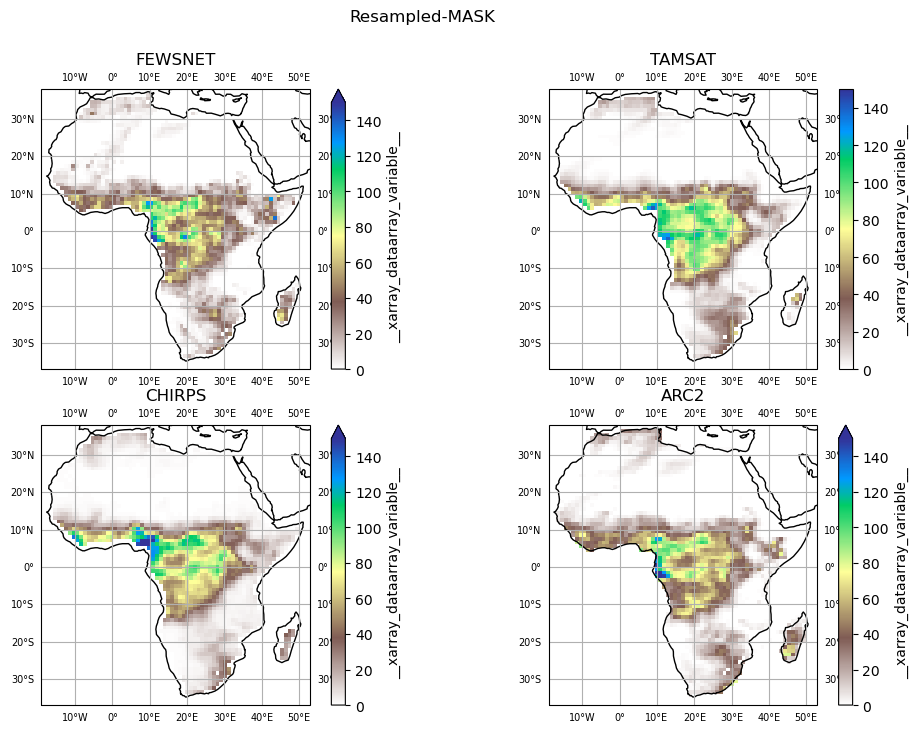

In [39]:
mask=Mask_Area_Plot(fout_phy1_clipped_resampled_mask, fout_phy2_clipped_resampled_mask,fout_phy3_clipped_resampled_mask,fout_phy4_clipped_resampled_mask,fout_phy1_clipped_resampled_mask_output,fout_phy2_clipped_resampled_mask_output,fout_phy3_clipped_resampled_mask_output,fout_phy4_clipped_resampled_mask_output)